In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy.optimize import minimize


Still the data generation process is the one where the meomery of advertising is driving the sales along with the idiosyncratic component.

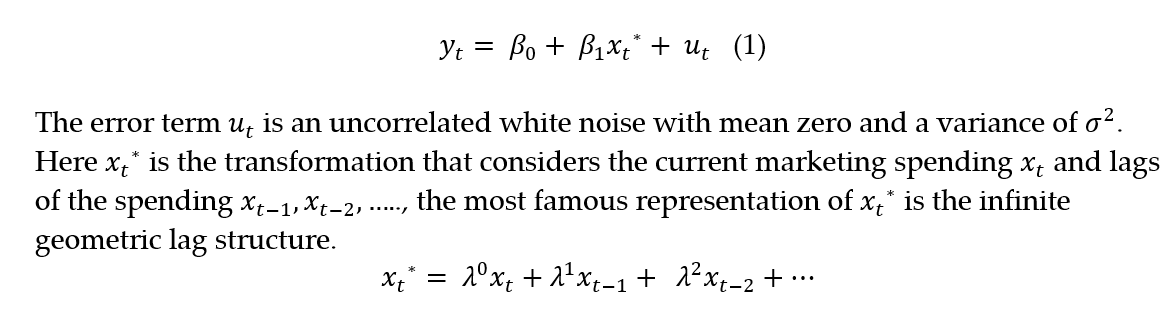

Text(0.5, 1.0, 'Advertising series and the Ad-stock')

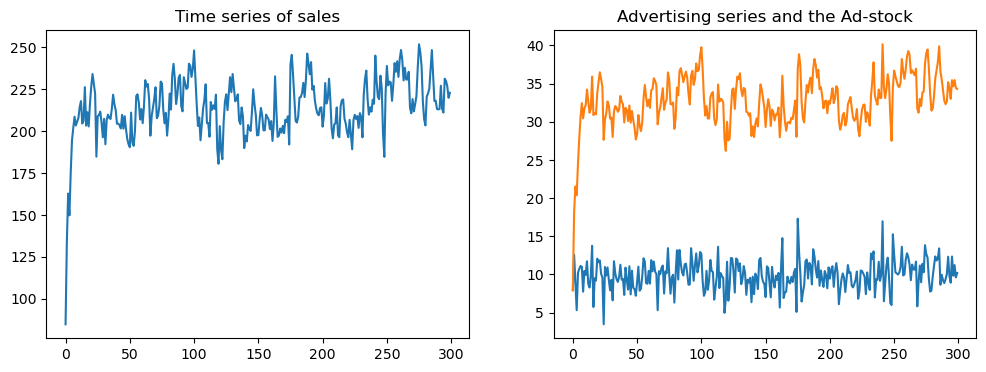

In [34]:
#Data generation process: Ad-stock model 
a0 = 50
a1 = 5
sigma = 4
gamma = 0.7
x = 10 + np.random.normal(0,2,300)
x_star = np.zeros(len(x))
x_star[0] = x[0]
for i in range(len(x)-1):
    x_star[i+1] = x[i+1] + gamma*x_star[i] 

y = np.zeros(len(x))
for i in range(len(x)):
    y[i] =  a0 + a1*x_star[i] + np.random.normal(0,sigma) 


fig, axs = plt.subplots(1, 2, figsize=(12, 4))
axs[0].plot(np.arange(len(x)), y, label='Sales')
axs[0].set_title('Time series of sales')
axs[1].plot(np.arange(len(x)), x, x_star, label='Advertising level and Ad stock')
axs[1].set_title('Advertising series and the Ad-stock')

The Koyck model:

The Koyck model starts with equation (1) and through using the lag operator one can derive an alternative representation of the infinite lag model famously known as the Koyck transformation:

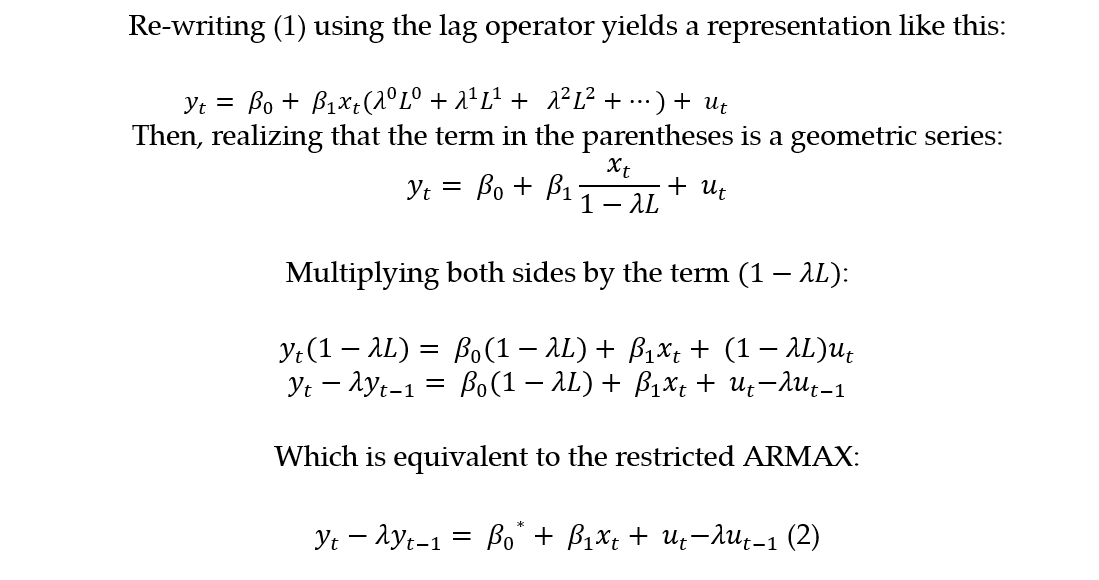

Now estimating the Koyck model requires additional customization of the likelihhood function, first the error term is initialized instead of the filtered series. Secondly, care should be taken that the likelihood estimator is now using fewer observation due to the lag presence.

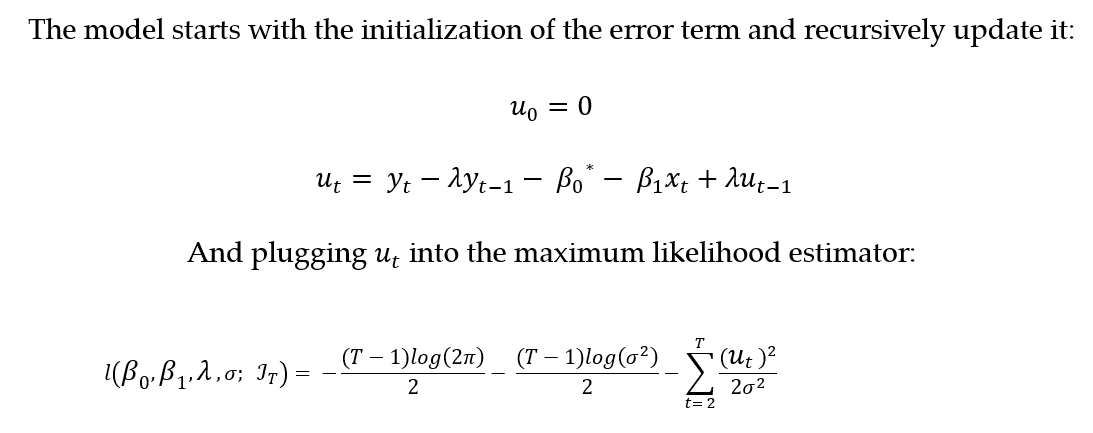

In [35]:
#Estimating the coefficients and the carry-over parameter:
#The likelihood function:
def log_likelihood(p,x,y):
    a0_hat = p[0]
    a1_hat = p[1]
    sigma_hat = p[2]
    gamma_hat = p[3]
    e = np.zeros(len(x))
    e[0] = 0 #initializing the error term
    for i in range(len(x)-1):
        e[i+1] = y[i+1] - gamma_hat*y[i] - a0_hat - a1_hat*x[i+1] + gamma_hat*e[i]

    l = -0.5*(len(x)-1)*np.log(2*np.pi) - 0.5*(len(x)-1)*np.log(sigma_hat**2) - np.sum(((y[1:]-a0_hat- gamma_hat*y[:-1]- a1_hat*x[1:] + gamma_hat*e[1:])**2)/(2*sigma_hat**2))
    return -l


In [40]:
a00 = np.sum(y)/len(y)
sigma11 = np.sum((y-a00)**2)/(len(y)-1)
p0 = [a00,1,sigma11,0.4] # the vector of parameters is now of size 4
ll = log_likelihood(p0,x,y)
ll

2022.818905278755

In [41]:
minimize(log_likelihood, p0, args= (x,y) )

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 1013.478396180061
        x: [ 2.061e+01  4.873e+00  7.175e+00  6.800e-01]
      nit: 51
      jac: [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00]
 hess_inv: [[ 5.622e+00 -7.171e-02  4.968e-03 -2.282e-02]
            [-7.171e-02  1.497e-02 -5.676e-04 -3.563e-04]
            [ 4.968e-03 -5.676e-04  8.714e-02 -1.203e-06]
            [-2.282e-02 -3.563e-04 -1.203e-06  1.228e-04]]
     nfev: 355
     njev: 71